In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import hvplot

[Request Link](https://globalweather.tamu.edu/request/view/36316)\
[Direct download](https://globalweather.tamu.edu/data/cfsr/36316_2020-12-31-02-56-09.zip)

In [42]:
df = pd.read_csv('weatherdata-1611081.csv', index_col=False)
df

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,108.125,16.0798,21,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,108.125,16.0798,21,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,108.125,16.0798,21,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,108.125,16.0798,21,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,108.125,16.0798,21,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...,...,...,...
12923,7/27/2014,108.125,16.0798,21,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,108.125,16.0798,21,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,108.125,16.0798,21,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,108.125,16.0798,21,27.441,21.986,24.712369,1.054239,0.960196,23.610801


In [43]:
df.drop(['Longitude','Latitude','Elevation'], axis=1, errors='ignore', inplace=True)
df

,Date,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...
12923,7/27/2014,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,27.441,21.986,24.712369,1.054239,0.960196,23.610801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12928 non-null  object 
 1   Max Temperature    12928 non-null  float64
 2   Min Temperature    12928 non-null  float64
 3   Precipitation      12928 non-null  float64
 4   Wind               12928 non-null  float64
 5   Relative Humidity  12928 non-null  float64
 6   Solar              12928 non-null  float64
dtypes: float64(6), object(1)
memory usage: 707.1+ KB


In [45]:
df['Date']=pd.to_datetime(df['Date'], errors = 'ignore') #Không cần thiết, cột Date có thể bỏ sau này
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               12928 non-null  datetime64[ns]
 1   Max Temperature    12928 non-null  float64       
 2   Min Temperature    12928 non-null  float64       
 3   Precipitation      12928 non-null  float64       
 4   Wind               12928 non-null  float64       
 5   Relative Humidity  12928 non-null  float64       
 6   Solar              12928 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 707.1 KB


In [46]:
df.isnull().sum() #dòng này cũng không cần thiết

Date                 0
Max Temperature      0
Min Temperature      0
Precipitation        0
Wind                 0
Relative Humidity    0
Solar                0
dtype: int64

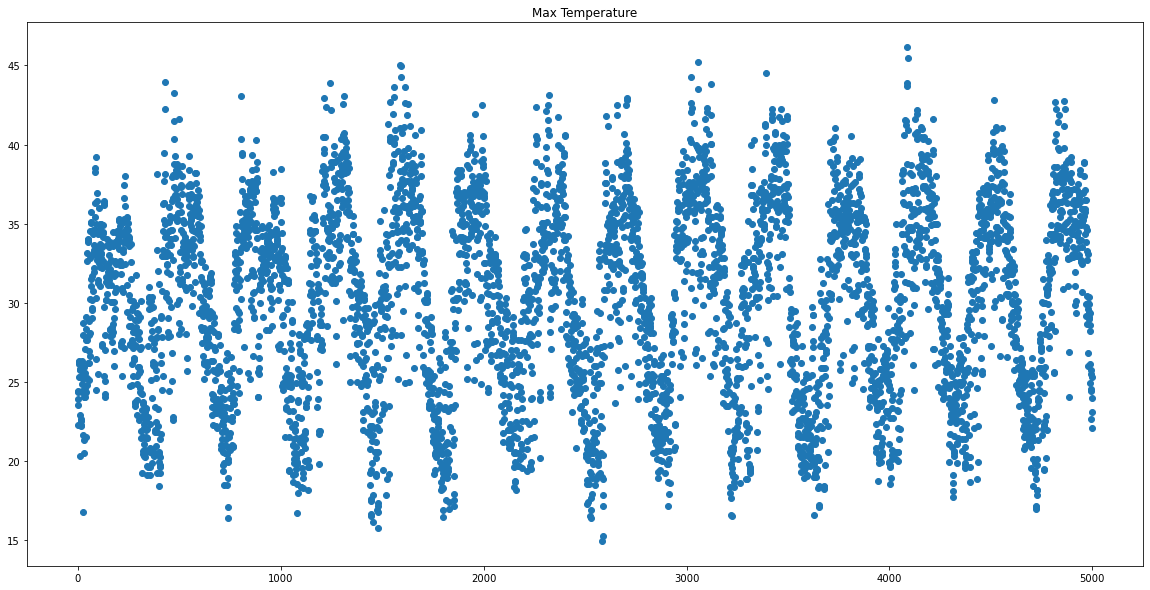

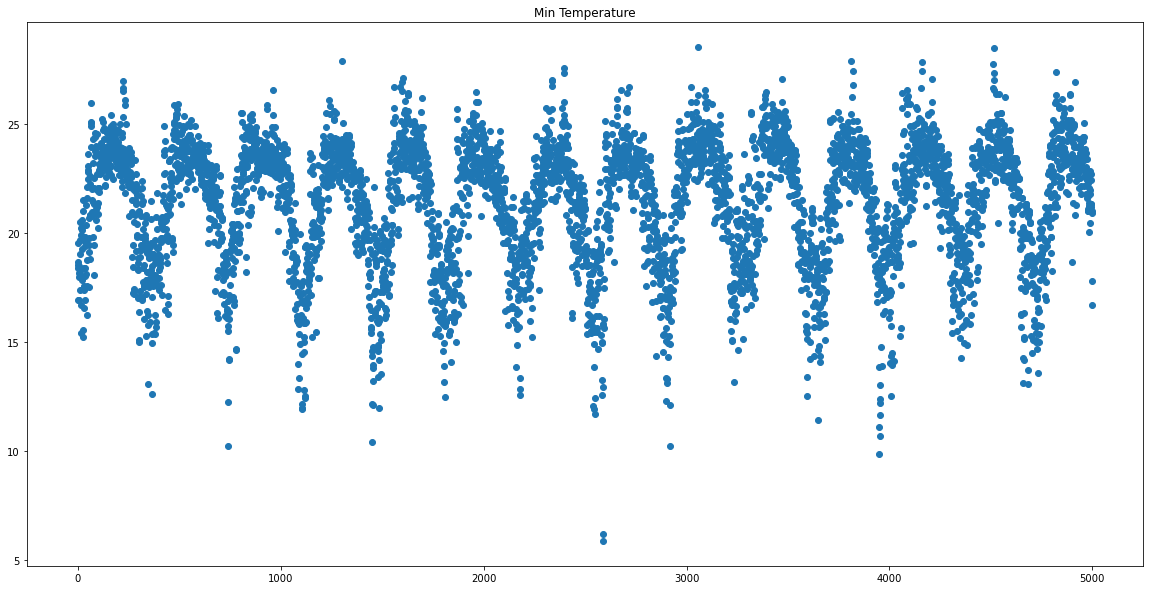

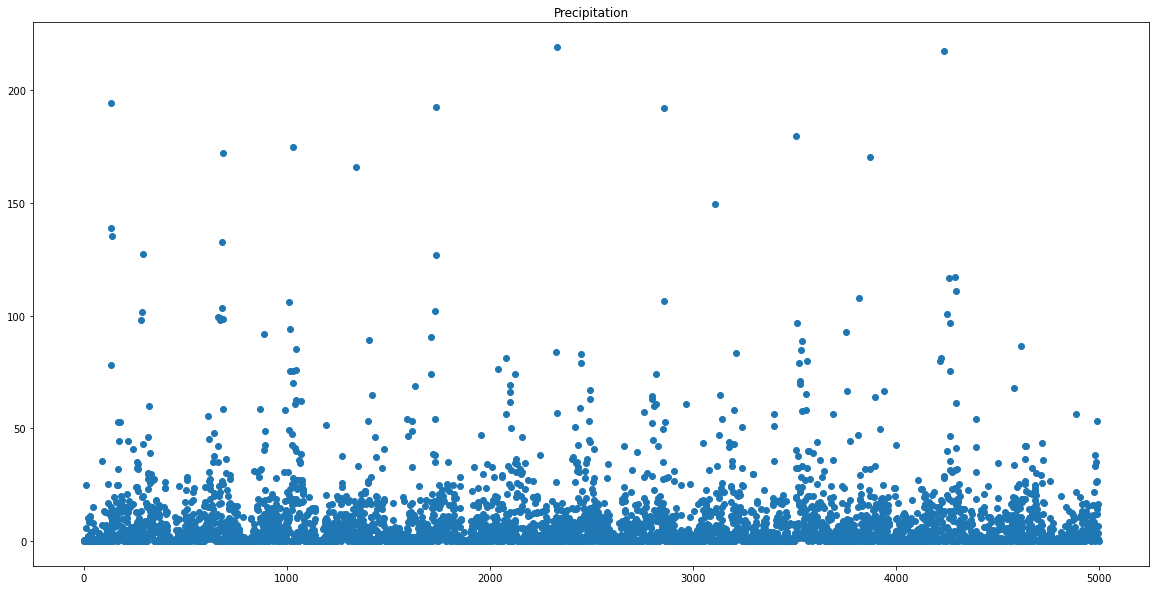

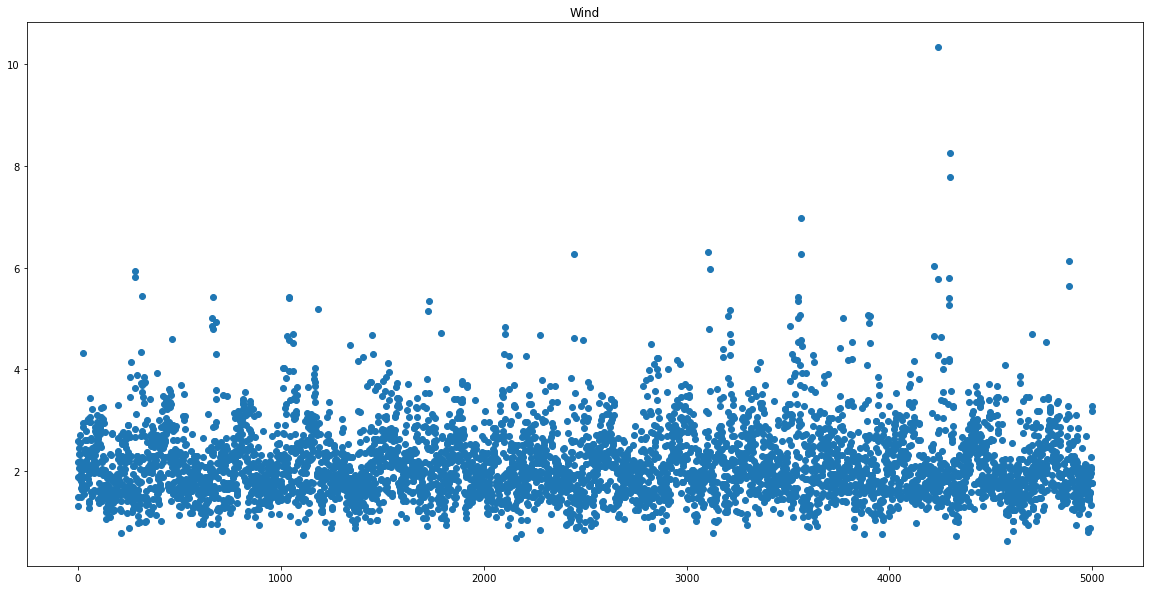

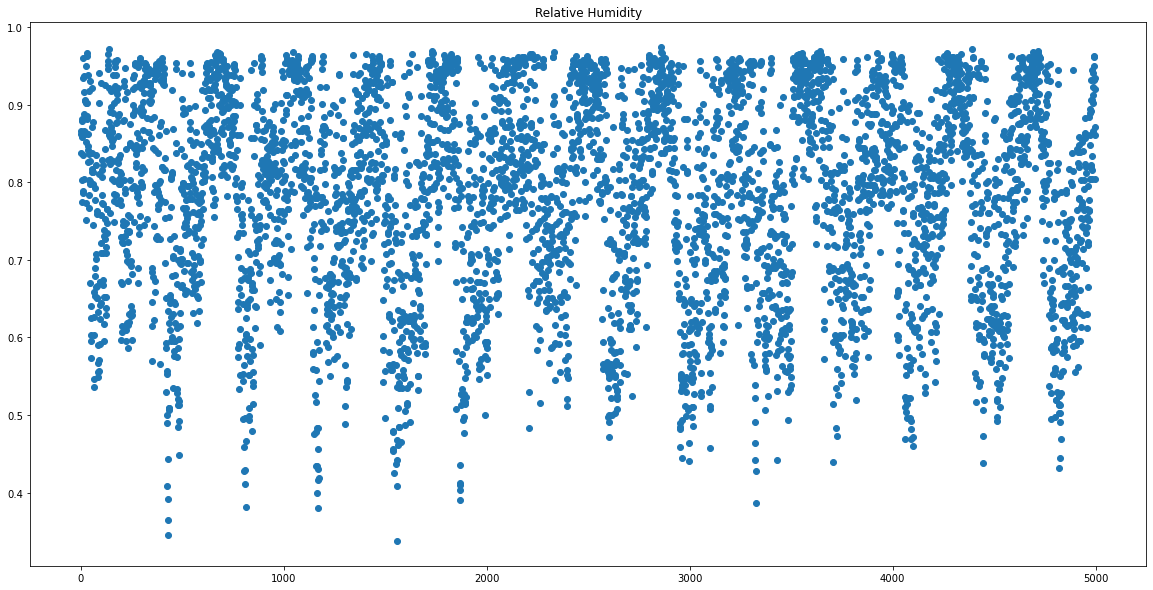

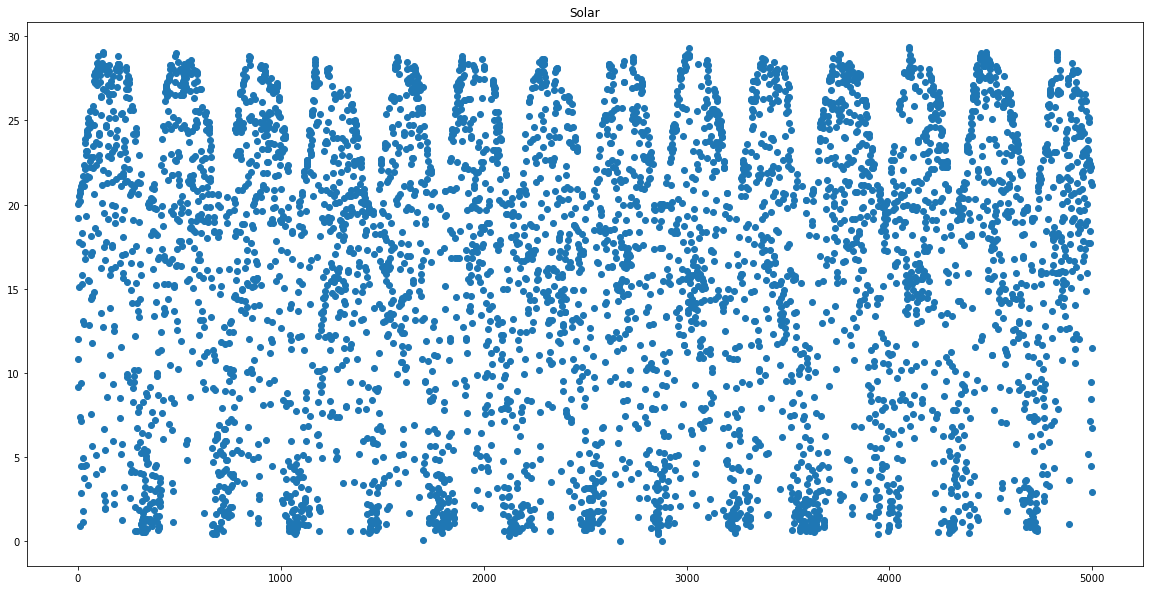

In [49]:
display_range = 5000
for col in ['Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity', 'Solar']:
    plt.figure(figsize=(20,10))
    plt.scatter(pd.RangeIndex(start=0, stop=display_range, step=1), df[col].head(display_range))
    plt.title(label=col)

In [ ]:
mean_temp = (df['Max Temperature'] + df['Min Temperature'])/2
mean_temp.head(10000).reset_index().plot(x='index', y=0, kind = 'scatter', figsize=[20,10])

In [ ]:
temp_variance = (df['Max Temperature'] - df['Min Temperature'])/2
temp_variance.head(10000).reset_index().plot(x='index', y=0, kind = 'scatter', figsize=[20,10])

In [10]:
df.insert(loc=3, column='Mean Temperature', value=mean_temp)
df

,Date,Max Temperature,Min Temperature,Mean Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1979-01-01,21.789,20.032,20.9105,8.433718,2.442694,0.945526,6.279357
1,1979-01-02,22.050,19.974,21.0120,1.917458,2.021508,0.923605,4.131790
2,1979-01-03,22.847,19.485,21.1660,0.520134,1.363726,0.865097,6.813003
3,1979-01-04,22.304,18.682,20.4930,0.224876,1.887963,0.862533,9.143603
4,1979-01-05,23.549,19.568,21.5585,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...,...
12923,2014-07-27,27.654,22.145,24.8995,123.403941,0.722276,0.960563,11.988250
12924,2014-07-28,27.882,22.253,25.0675,38.002393,0.805266,0.950569,21.488302
12925,2014-07-29,28.599,20.573,24.5860,20.422551,0.824725,0.943231,9.977630
12926,2014-07-30,27.441,21.986,24.7135,24.712369,1.054239,0.960196,23.610801


## Derive nth day features:

In [47]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{} {}".format(feature, N)
    df[col_name] = nth_prior_measurements

for feature in df.columns:
    if feature != 'Date':
        for N in range(1, 3):
            derive_nth_day_feature(df, feature, N)

df.drop([0,1,2], axis=0, inplace=True)
df.columns


Index(['Date', 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind',
       'Relative Humidity', 'Solar', 'Max Temperature 1', 'Max Temperature 2',
       'Min Temperature 1', 'Min Temperature 2', 'Precipitation 1',
       'Precipitation 2', 'Wind 1', 'Wind 2', 'Relative Humidity 1',
       'Relative Humidity 2', 'Solar 1', 'Solar 2'],
      dtype='object')

In [12]:
# Hệ số tương quan giữa các đặc trưng (0 - không có tương quan tuyến tính, +-1 - hoàn toàn tương quan tuyến tính)
df.corr()[['Max Temperature', 'Min Temperature', 'Mean Temperature','Precipitation', 'Wind', 'Relative Humidity', 'Solar']]

,Max Temperature,Min Temperature,Mean Temperature,Precipitation,Wind,Relative Humidity,Solar
Max Temperature,1.000000,0.752907,0.973797,-0.306375,-0.037356,-0.819498,0.661788
Min Temperature,0.752907,1.000000,0.882848,0.016032,0.118793,-0.552411,0.323741
Mean Temperature,0.973797,0.882848,1.000000,-0.213099,0.014391,-0.775704,0.584141
Precipitation,-0.306375,0.016032,-0.213099,1.000000,0.224583,0.442671,-0.408746
Wind,-0.037356,0.118793,0.014391,0.224583,1.000000,-0.204833,-0.075827
Relative Humidity,-0.819498,-0.552411,-0.775704,0.442671,-0.204833,1.000000,-0.582893
Solar,0.661788,0.323741,0.584141,-0.408746,-0.075827,-0.582893,1.000000
Max Temperature 1,0.896241,0.758887,0.901818,-0.216044,0.012779,-0.731087,0.534837
Max Temperature 2,0.824099,0.744340,0.845309,-0.150558,0.036816,-0.653288,0.459582
Min Temperature 1,0.728216,0.884640,0.825365,0.012717,0.110111,-0.514379,0.326556


In [30]:
predictors = ['Max Temperature 1', 'Max Temperature 2', 'Min Temperature 1',
       'Min Temperature 2', 'Mean Temperature 1', 'Mean Temperature 2',
       'Precipitation 1', 'Precipitation 2', 'Wind 1', 'Wind 2',
       'Relative Humidity 1', 'Relative Humidity 2', 'Solar 1', 'Solar 2']
df2 = df[['Mean Temperature'] + predictors]


In [ ]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=4, ncols=2, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(4, 2)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['Mean Temperature'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Mean Temperature')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [36]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]
y = df2['Mean Temperature']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)

X.iloc[:10]

,const,Max Temperature 1,Max Temperature 2,Min Temperature 1,Min Temperature 2,Mean Temperature 1,Mean Temperature 2,Precipitation 1,Precipitation 2,Wind 1,Wind 2,Relative Humidity 1,Relative Humidity 2,Solar 1,Solar 2
3,1.0,22.847,22.050,19.485,19.974,21.1660,21.0120,0.520134,1.917458,1.363726,2.021508,0.865097,0.923605,6.813003,4.131790
4,1.0,22.304,22.847,18.682,19.485,20.4930,21.1660,0.224876,0.520134,1.887963,1.363726,0.862533,0.865097,9.143603,6.813003
5,1.0,23.549,22.304,19.568,18.682,21.5585,20.4930,0.509834,0.224876,2.179407,1.887963,0.865400,0.862533,10.840449,9.143603
6,1.0,24.410,23.549,18.392,19.568,21.4010,21.5585,0.010300,0.509834,2.584719,2.179407,0.837970,0.865400,20.021504,10.840449
7,1.0,23.953,24.410,16.938,18.392,20.4455,21.4010,0.163078,0.010300,1.309522,2.584719,0.881904,0.837970,12.011401,20.021504
8,1.0,24.352,23.953,18.549,16.938,21.4505,20.4455,0.118446,0.163078,1.483348,1.309522,0.878639,0.881904,19.203246,12.011401
9,1.0,25.320,24.352,16.931,18.549,21.1255,21.4505,0.000000,0.118446,1.894250,1.483348,0.858579,0.878639,15.089739,19.203246
10,1.0,26.267,25.320,17.988,16.931,22.1275,21.1255,0.000000,0.000000,2.068331,1.894250,0.802633,0.858579,17.766723,15.089739
11,1.0,26.142,26.267,18.513,17.988,22.3275,22.1275,0.000000,0.000000,2.454955,2.068331,0.774187,0.802633,20.152630,17.766723
12,1.0,26.321,26.142,18.186,18.513,22.2535,22.3275,0.000000,0.000000,2.335910,2.454955,0.788297,0.774187,20.507117,20.152630


In [29]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Mean Temperature   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.657e+05
Date:                Sun, 10 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:21:33   Log-Likelihood:                         -24384.
No. Observations:               12925   AIC:                                  4.878e+04
Df Residuals:                   12919   BIC:                                  4.882e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Max Temperature 1       0.2520      0.006     40.599      0.000       0.240       0.264
Max Temperature 2       0.0748      0.006     11.774      0.000       0.062       0.087
Min Temperature 1       0.3199      0.009     34.684      0.000       0.302       0.338
Min Temperature 2      -0.0064      0.009     -0.711      0.477      -0.024       0.011
Mean Temperature 1      0.2859      0.004     68.891      0.000       0.278       0.294
Mean Temperature 2      0.0342      0.004      8.342      0.000       0.026       0.042
Relative Humidity 1    -2.2757      0.277     -8.218      0.000      -2.818      -1.733
Relative Humidity 2     3.4647      0.276     12.532      0.000       2.923       4.007
==============================================================================
Omnibus:                     1024.775   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2649.095
Skew:                          -0.462   Prob(JB):                         0.00
Kurtosis:                       5.016   Cond. No.                     5.87e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
#X = X.drop('Mean Temperature 2', axis=1)

In [18]:
from sklearn.model_selection import train_test_split

# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
from sklearn.linear_model import LinearRegression
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.860843
The Mean Absolute Error: 1.192939 degrees celsius
The Median Absolute Error: 0.927906 degrees celsius


---

# Using Neural Network:

In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [52]:
predictors =['Max Temperature 1', 'Max Temperature 2', 
             'Min Temperature 1', 'Min Temperature 2',
             'Precipitation 1', 'Precipitation 2', 
             'Wind 1', 'Wind 2',
             'Relative Humidity 1', 'Relative Humidity 2', 
             'Solar 1', 'Solar 2']
output_vars = ['Max Temperature', 'Min Temperature','Precipitation']

X = df[predictors]
y = df[output_vars]

In [62]:
display(X.head(5))
display(y.head(5))

,Max Temperature 1,Max Temperature 2,Min Temperature 1,Min Temperature 2,Precipitation 1,Precipitation 2,Wind 1,Wind 2,Relative Humidity 1,Relative Humidity 2,Solar 1,Solar 2
3,22.847,22.050,19.485,19.974,0.520134,1.917458,1.363726,2.021508,0.865097,0.923605,6.813003,4.131790
4,22.304,22.847,18.682,19.485,0.224876,0.520134,1.887963,1.363726,0.862533,0.865097,9.143603,6.813003
5,23.549,22.304,19.568,18.682,0.509834,0.224876,2.179407,1.887963,0.865400,0.862533,10.840449,9.143603
6,24.410,23.549,18.392,19.568,0.010300,0.509834,2.584719,2.179407,0.837970,0.865400,20.021504,10.840449
7,23.953,24.410,16.938,18.392,0.163078,0.010300,1.309522,2.584719,0.881904,0.837970,12.011401,20.021504


,Max Temperature,Min Temperature,Precipitation
3,22.304,18.682,0.224876
4,23.549,19.568,0.509834
5,24.410,18.392,0.010300
6,23.953,16.938,0.163078
7,24.352,18.549,0.118446


In [74]:
df[set(df.columns)-set(predictors)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Precipitation,12925.0,8.078341,15.994444,0.000000,0.027466,2.221299,9.534073,236.429173
Wind,12925.0,2.044396,0.746069,0.297345,1.537092,1.925574,2.405015,10.332604
Relative Humidity,12925.0,0.801126,0.131142,0.258958,0.708397,0.825385,0.913693,0.994881
Max Temperature,12925.0,29.791186,6.179657,13.125000,24.897000,30.002000,34.770000,46.173000
Solar,12925.0,16.313347,8.832827,0.000000,8.827703,18.185858,23.853378,29.411329
Min Temperature,12925.0,21.321917,2.992306,5.871000,19.417000,21.888000,23.539000,29.249000


In [78]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 80:20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
print(X_train.shape)
print(y_train.shape)

(10340, 12)
(10340, 3)


In [113]:
pipeline = make_pipeline(StandardScaler(), 
                         MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000))
train_errs = []
val_errs = []
alphas = [0.01, 0.015, 0.1, 0.4, 1, 3]
best_val_err = float('inf'); best_alpha = None;
                         
for alpha in alphas:
    pipeline.set_params(mlpregressor__alpha = alpha)
    pipeline.fit(X_train, y_train)
    train_err = (1 - pipeline.score(X_train, y_train))*100
    val_err = (1 - pipeline.score(X_val, y_val))*100
    if val_err < best_val_err:
        best_val_err = val_err
        best_alpha = alpha
    train_errs.append(train_err)
    val_errs.append(val_err)
'Done'

'Done'

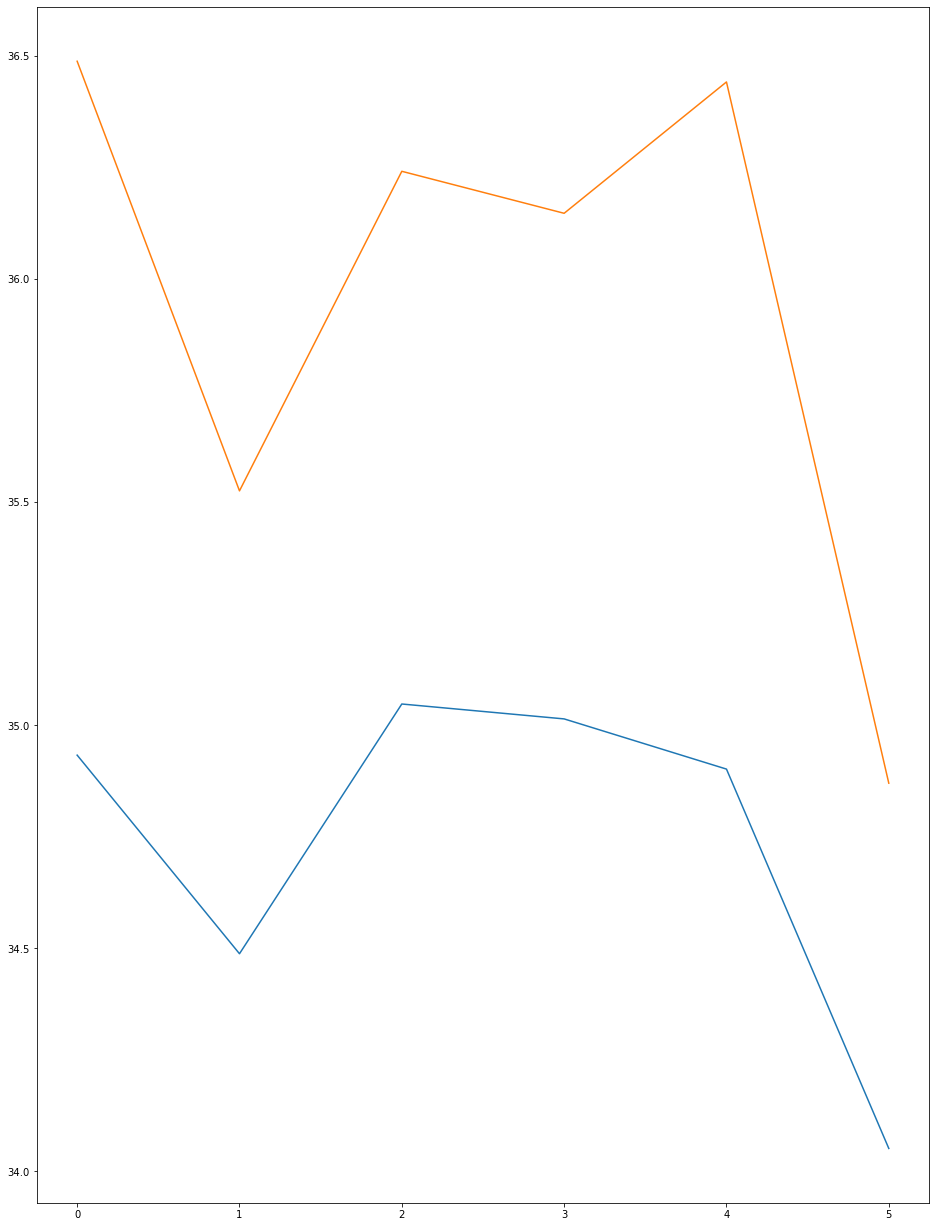

In [114]:
plt.plot(train_errs)
plt.plot(val_errs)

---

In [20]:
data = pd.read_csv('danang_weather_1957_2020.csv')
data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-01,59.7,8,0,NaN,...,999.9,NaN,15.4,8,68.5,8,16.7,8,2.8,8
1,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-02,61.5,8,0,NaN,...,999.9,NaN,14.6,8,67.6,8,19.9,8,3.5,8
2,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-03,62.5,8,0,NaN,...,999.9,NaN,13.9,8,68.4,8,17.4,8,1.8,8
3,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-04,65.1,8,10000,NaN,...,999.9,NaN,14.3,8,71.0,8,13.3,8,9.1,8
4,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-05,67.4,8,10000,NaN,...,999.9,NaN,14.3,8,70.2,8,5.9,8,4.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21888,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-22,61.2,24,10000,NaN,...,999.9,NaN,999.9,0,68.5,24,6.0,24,2.3,24
21889,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-23,63.6,24,0,NaN,...,999.9,NaN,999.9,0,71.6,24,6.0,24,3.1,24
21890,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-24,66.6,24,10000,NaN,...,999.9,NaN,999.9,0,70.7,24,4.5,24,3.3,24
21891,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-25,68.0,24,10000,NaN,...,999.9,NaN,999.9,0,70.8,24,5.0,24,2.0,24


In [21]:
data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DEWP',
       'DEWP_ATTRIBUTES', 'FRSHTT', 'FRSHTT_ATTRIBUTES', 'GUST',
       'GUST_ATTRIBUTES', 'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES',
       'MXSPD', 'MXSPD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SLP',
       'SLP_ATTRIBUTES', 'SNDP', 'SNDP_ATTRIBUTES', 'STP', 'STP_ATTRIBUTES',
       'TEMP', 'TEMP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES'],
      dtype='object')

Xoá một số cột không cần thiết: 
   - Các cột ATTRIBUTES (thường chỉ ra số lần quan trắc để lấy dữ liệu).
   - STATION, NAME, LATITUDE, LONGTITIDE, ELEVATION (chỉ ra mã, tên, toạ độ và cao độ của trạm quan trắc, xoá vì số liệu chỉ lấy từ 1 trạm duy nhất).
   - GUST (xoá vì 99% số dòng thiếu số liệu).
   - SNDP (toàn bộ các dòng không có số liệu). 

In [22]:
data.drop(data.filter(like='ATTRIBUTES',axis=1).columns, axis=1, inplace=True)
data.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE','ELEVATION','GUST','SNDP'], axis=1, errors='ignore', inplace=True)
data

,DATE,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
0,1957-01-01,59.7,0,79.3,60.3,8.0,0.00,1016.3,15.4,68.5,16.7,2.8
1,1957-01-02,61.5,0,75.4,60.3,13.0,0.00,1015.4,14.6,67.6,19.9,3.5
2,1957-01-03,62.5,0,76.3,58.3,7.0,0.00,1015.4,13.9,68.4,17.4,1.8
3,1957-01-04,65.1,10000,75.4,64.4,15.0,99.99,1015.2,14.3,71.0,13.3,9.1
4,1957-01-05,67.4,10000,74.3,67.3,13.0,99.99,1015.1,14.3,70.2,5.9,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
21888,2020-12-22,61.2,10000,71.6,65.5,6.0,0.00,9999.9,999.9,68.5,6.0,2.3
21889,2020-12-23,63.6,0,75.2,67.3,8.9,0.00,9999.9,999.9,71.6,6.0,3.1
21890,2020-12-24,66.6,10000,75.2,68.0,8.0,0.02,9999.9,999.9,70.7,4.5,3.3
21891,2020-12-25,68.0,10000,73.4,68.2,5.1,0.09,9999.9,999.9,70.8,5.0,2.0


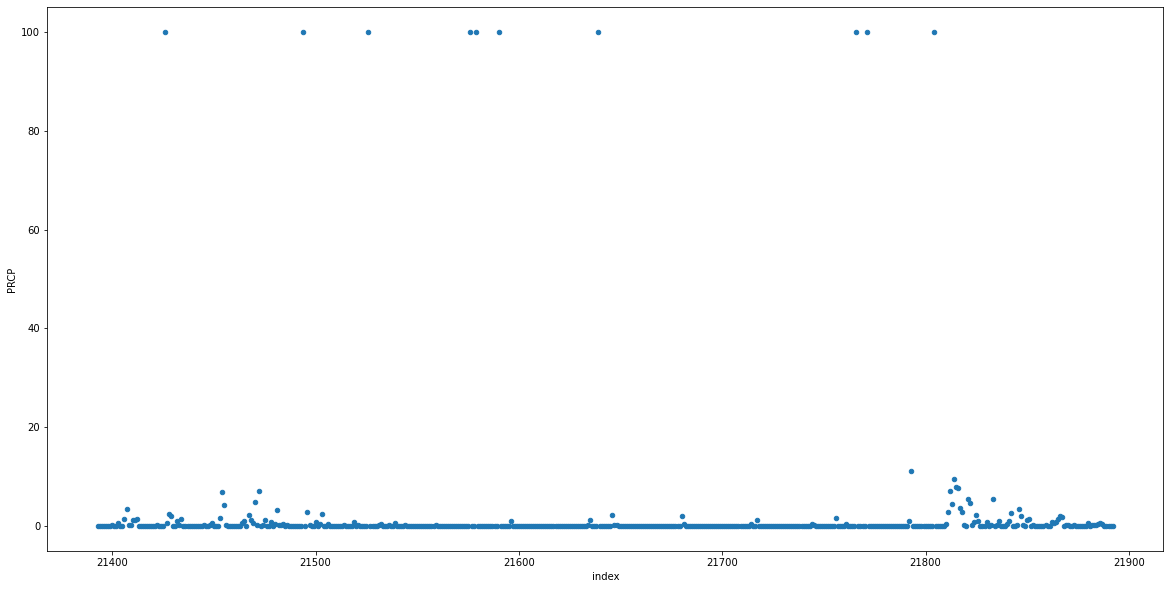

In [23]:
prcp = data['PRCP']
prcp.tail(500).reset_index().plot(x='index',y='PRCP',kind='scatter', figsize=(20,10))

Một số điểm dữ liệu bị thiếu (có giá trị 99.99) sẽ được thêm vào bằng cách lấy giá trị trung bình của 2 điểm lân cận.

(-5.0, 105.0)

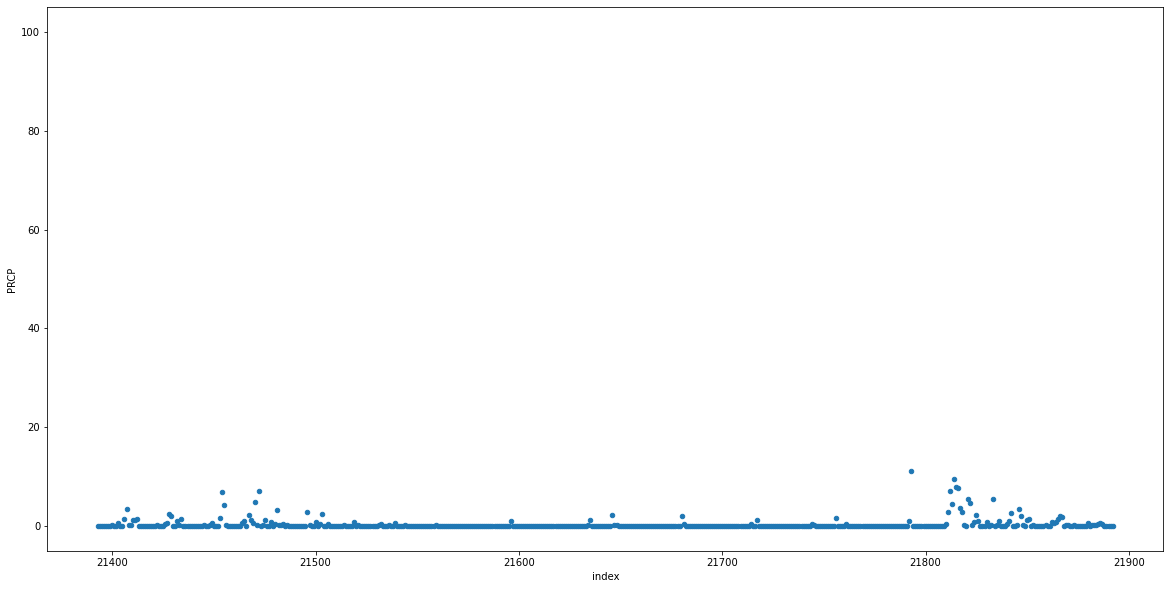

In [24]:
prcp.replace(to_replace = 99.99, value = np.nan, inplace = True) #thay thế giá trị 99.99 bằng NaN
prcp.interpolate(method = 'linear', inplace=True) #thay thế các giá trị NaN bằng trung bình của 2 điểm lân cận

plt = prcp.tail(500).reset_index().plot(x='index',y='PRCP',kind='scatter', figsize=(20,10))
plt.set_ylim(-5,105)

998.3     0.004568
27.2      0.004568
994.4     0.004568
995.9     0.004568
24.1      0.004568
           ...    
4.8       0.342575
4.5       0.351711
5.2       0.360846
6.3       0.369981
999.9    58.055086
Name: STP, Length: 284, dtype: float64

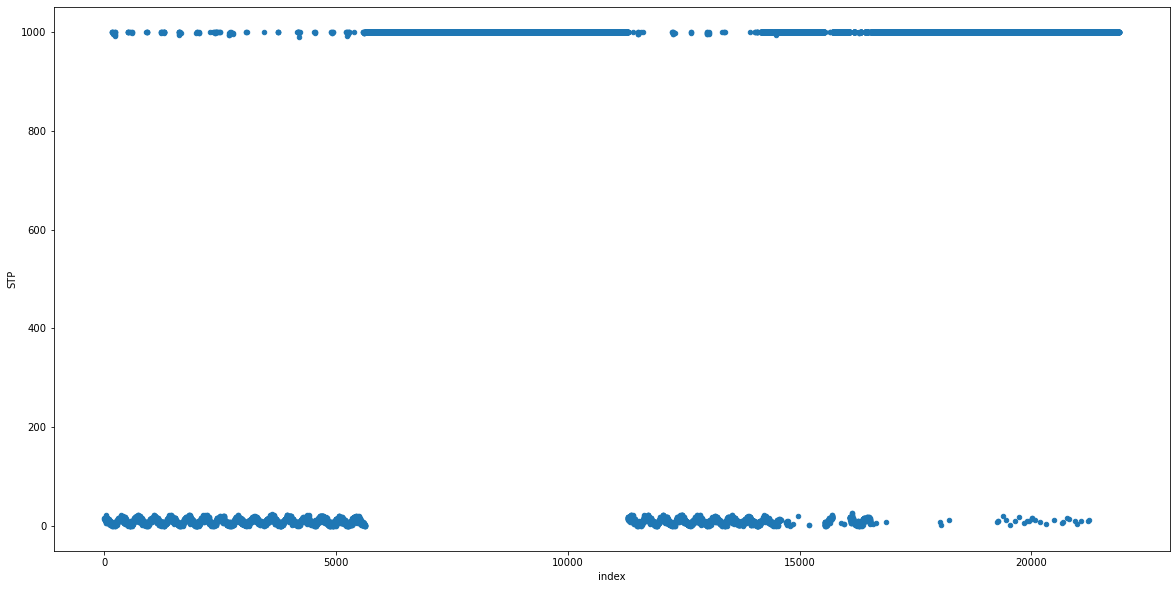

In [25]:
stp = data['STP']
#stp.replace(to_replace = 999.9, value = np.nan, inplace = True)
stp.reset_index().plot(x='index',y='STP',kind='scatter', figsize=(20,10))
stp.value_counts().sort_values()/21893*100